In [1]:
""" Import packages """

import pandas as pd
import numpy as np

import seaborn as sns
sns.set()  # Setting seaborn as default style even if use only matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_score, adjusted_rand_score

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")  # To ignore warnings
    

---

<center><B><h1>Unsupervised Clustering for Non-FLAT Dataset</h1></B></center>

---

## Generate moons Dataset:

First, We'll import moons dataset from Scikit-Learn library which is non-linear as shown below. And then we will discuss different types of unsupervised clustering techniques to cluster that difficult dataset successfully.

In [2]:
# Generate moons dataset with some noise and split it into X, y variables
X, y = make_moons(200, noise = .05, random_state = 0)

# Shapes of X and y
print(X.shape)
print(y.shape)

(200, 2)
(200,)


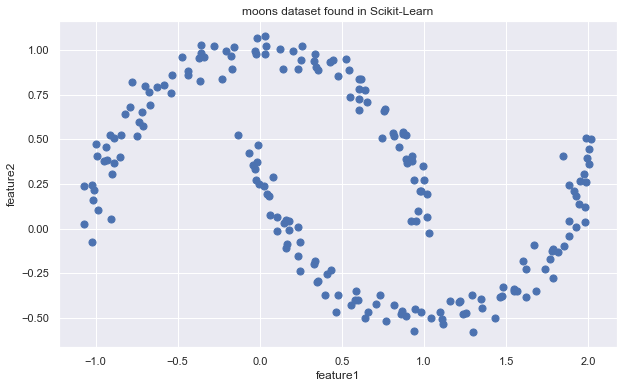

In [3]:
# Plot the moons-dataset
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('moons dataset found in Scikit-Learn')
plt.show()

## K-means clustering for non flat dataset

    k-means is limited to linear cluster boundaries which means that this algorithm will often be ineffective if the clusters have complicated geometries such as moons dataset from Scikit-Learn.

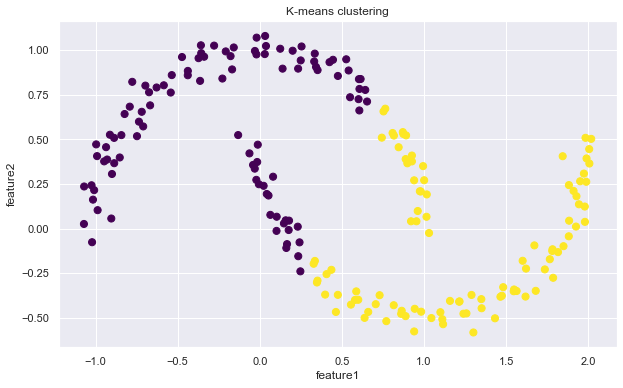

In [4]:
# Train the model
labels = KMeans(2, random_state = 0).fit_predict(X)

# Plot the data after clustering using Kmeans
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('K-means clustering')
plt.show()

### Evaluation matrices:

- <B>Silhouette Coefficient:</B>
        is a metric used to calculate the goodness of a clustering technique ranges from -1 to 1.
        
             1 : Means clusters are well apart from each other and clearly distinguished.
             0 : Means clusters are indifferent, or we can say that the distance between clusters is not significant.
            -1 : Means clusters are assigned in the wrong way.

- <B>Rand Score:</B>

        is a metric used to ensure having a value close to 0.0 for random labeling independently of the number of clusters and samples 
        and exactly 1.0 when the clusterings are identical (up to a permutation).

In [5]:
# Evaluation matrices
print('Silhouette Score =', silhouette_score(X, labels))
print('Rand Score       =', adjusted_rand_score(labels, y))

Silhouette Score = 0.49215648268306905
Rand Score       = 0.25636350688711773


In [6]:
# Use silhouette score
range_n_clusters = list(range(2, 10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters).fit(X)
    preds = clusterer.predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric = 'euclidean')
    print ("For n_clusters = {}, silhouette score is {})"
                                   .format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.49215648268306905)
For n_clusters = 3, silhouette score is 0.4235885587196927)
For n_clusters = 4, silhouette score is 0.44709257821561577)
For n_clusters = 5, silhouette score is 0.482688809905608)
For n_clusters = 6, silhouette score is 0.5024852874025354)
For n_clusters = 7, silhouette score is 0.5131364283986685)
For n_clusters = 8, silhouette score is 0.5299228628714374)
For n_clusters = 9, silhouette score is 0.5279814929573702)


---

## kernelized k-means clustering for non flat dataset

* Here, We should think about the kernel trick. 
* Let's try kernelized k-means `SpectralClustering` to discover non-linear boundaries.
* It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

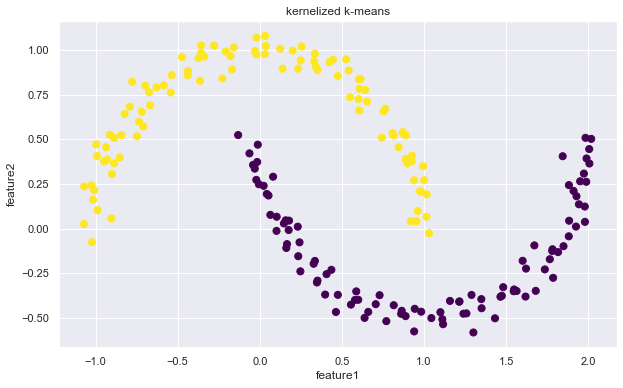

In [7]:
# Train the model
model = SpectralClustering(n_clusters = 2,
                           affinity = 'nearest_neighbors',
                           assign_labels = 'kmeans')
labels = model.fit_predict(X)

# Plot the data after clustering using kernelized k-means
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('kernelized k-means')
plt.show()

In [8]:
# Evaluation matrices
print('Silhouette Score =', silhouette_score(X, labels))
print("Rand Score = ", adjusted_rand_score(labels, y))

Silhouette Score = 0.32585318950197517
Rand Score =  1.0


<center> Finally, we can notice that the kernelized k-means `SpectralClustering` successed to cluster the non linear data with Rand Score = 1.0 than k-means with Rand Score = 0.26 </center>

---

## DBSCAN clustering:

A density based clustering method that expands clusters from 
    samples that have more neighbors within a radius specified by eps
    than the value min_samples

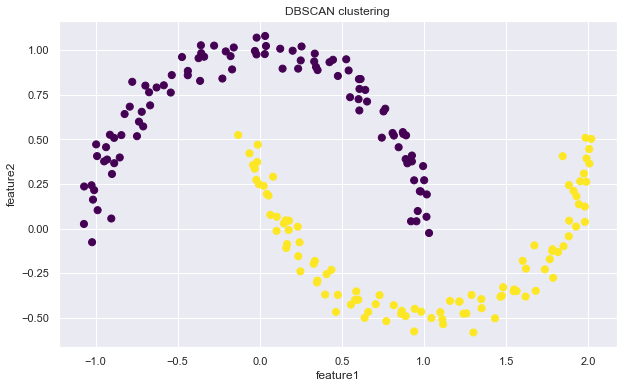

In [9]:
# Train the model using eps = 0.2 
labels = DBSCAN(eps = 0.2,
                min_samples = 5 , 
                metric = 'euclidean').fit_predict(X)

# Plot the data after clustering using DBSCAN
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('DBSCAN clustering')
plt.show()

In [10]:
# Evaluation matrices
print('Silhouette Score =', silhouette_score(X, labels))
print('Rand Score       =', adjusted_rand_score(labels, y))

Silhouette Score = 0.32585318950197517
Rand Score       = 1.0


    It's clear that DBSCAN algorithm has the same result as the kernalized k-means both succeeded to cluster the moons dataset.

---